# <font color="orange">Load modules</font> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import sklearn.naive_bayes
from sklearn.pipeline import make_pipeline
import sklearn.ensemble
import numpy as np
import sklearn.linear_model as lm
import sklearn.naive_bayes
import seaborn as sns
import sys
sys.path.append("/Users/macbookpro/UCL - MSc Integrated Machine Learning Systems/Y1/Applied Machine Learning I/Final Assignment/AMLS_20-21_SN17024244")
from _CFG_Task_A import *
from _CLASS_ImageManager import *

In the following lines we load the labels .csv file.

In [2]:
# Now we load the label.csv file and store the gender labels in y variable, replacing -1 with 0
y = load_images_label_csv("gender")
y[y==-1] = 0

# <font color="orange">Load and process images</font> 

We leverage on the **ImageManager** class object to load the whole set of images as well as crop them based on the body part we are interested in. The processing is based on a Cascade Classifier. We will implement our use case using the Haar Cascade classifier, which is an effective object detection approach which was proposed by Paul Viola and Michael Jones. This is basically a machine learning based approach where a cascade function is trained from a lot of images both positive and negative. Based on the training it is then used to detect the objects in the other images.
So how this works is they are huge individual .xml files with a lot of feature sets and each xml corresponds to a very specific type of use case.

In [3]:
imgmgr = ImageManager()
imgmgr.load_images_from_folder(sub_folder, extension, verbose = True,
#                               colour = cv2.IMREAD_GRAYSCALE    # B&W conversion
                              )
imgmgr.bodypart = "face"
imges = imgmgr.crop_part((36,36), squaring = False, x_offsets=(1/8,-1/8), y_offsets = (1/8,-1/8))

Starting to load images from /Users/macbookpro/UCL - MSc Integrated Machine Learning Systems/Y1/Applied Machine Learning I/Final Assignment/AMLS_20-21_SN17024244/Datasets/dataset_AMLS_20-21/celeba/img/ with extension .jpg
2430/5000 images loaded
4812/5000 images loaded
5000/5000 images loaded


This is an example of an image after processing.

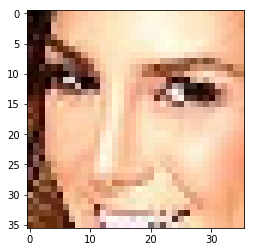

In [4]:
rgb = cv2.cvtColor(imges[0], cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

# <font color="orange">Solving exercise using various machine learning approches</font> 

Once our images have been processed, we can split our dataset into train and test sets.

In [5]:
X = imgmgr.images
X = X.reshape(X.shape[0], np.prod(X.shape[1:]))
X_train, X_test, y_train, y_test = train_test_split(X, y)

### ? Cross Validation ?

In [31]:
import sklearn.model_selection
param_grid = {"loss":[ "squared_hinge", "perceptron",], 
              "penalty":["l1","elasticnet"]}

clf = sklearn.model_selection.GridSearchCV(lm.SGDClassifier(), param_grid, scoring=None, n_jobs=None, iid='deprecated', refit=True, 
                                     cv=None, verbose=1, pre_dispatch='2*n_jobs', return_train_score=False)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.0min finished


GridSearchCV(estimator=SGDClassifier(),
             param_grid={'loss': ['squared_hinge', 'perceptron'],
                         'penalty': ['l1', 'elasticnet']},
             verbose=1)

In [32]:
clf.best_estimator_

SGDClassifier(loss='squared_hinge', penalty='l1')

In [34]:
print(clf.score(X_test, y_test))

0.8584


In [35]:
clf

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'loss': ['squared_hinge', 'perceptron'],
                         'penalty': ['l1', 'elasticnet']},
             verbose=1)

Here below you will find 4 different approaches to the gender detection problem. Supervised learning techniques are used.

### 1. Support Vector Machine

Comment on why L1 norm performs better.

Explain:

- Why MinMaxScaler()
- Why penalty L1
- Why other params

In [6]:
clf = make_pipeline(MinMaxScaler(),
                     lm.SGDClassifier(loss='hinge', penalty='l1', alpha=0.0001, l1_ratio=0.2, fit_intercept=True, max_iter=10000, tol=0.0001, 
                                   shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', 
                                   eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False))
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("TRAIN METRICS")
print(sklearn.metrics.classification_report(y_train, y_pred_train))
print("TEST METRICS")
print(sklearn.metrics.classification_report(y_test, y_pred_test))

TRAIN METRICS
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1879
           1       0.91      0.94      0.92      1871

    accuracy                           0.92      3750
   macro avg       0.92      0.92      0.92      3750
weighted avg       0.92      0.92      0.92      3750

TEST METRICS
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       621
           1       0.85      0.84      0.84       629

    accuracy                           0.84      1250
   macro avg       0.84      0.84      0.84      1250
weighted avg       0.84      0.84      0.84      1250



We present the confusion matrix once data has been trained using SVM.

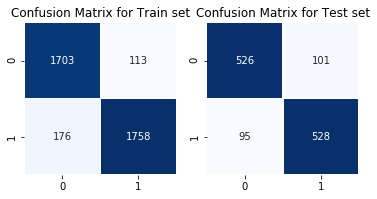

In [7]:
train_test_confusion_matrix(y_train, y_pred_train, y_test, y_pred_test)

### 2. Random Forest

Once a backtesting on the optimal number of trees is performed, then we can decide on the final n_estimator parameter. As you can see from the chart below, including ta least 20 trees will increase the accuracy significantly. Gini vs Entropy.

In [36]:
clf = sklearn.ensemble.RandomForestClassifier(n_estimators = 70, criterion="entropy")
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("TRAIN METRICS")
print(sklearn.metrics.classification_report(y_train, y_pred_train))
print("TEST METRICS")
print(sklearn.metrics.classification_report(y_test, y_pred_test))

TRAIN METRICS
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1890
           1       1.00      1.00      1.00      1860

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750

TEST METRICS
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       610
           1       0.80      0.84      0.82       640

    accuracy                           0.81      1250
   macro avg       0.81      0.81      0.81      1250
weighted avg       0.81      0.81      0.81      1250



No handles with labels found to put in legend.


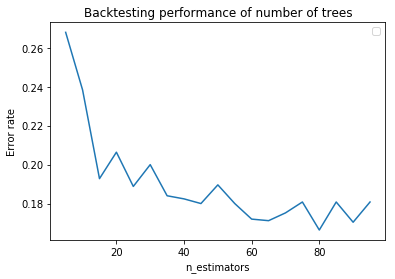

In [37]:
n_estimators=np.arange(5, 100, 5)

# Dictionary containing (<n_estimators>, <error rate>) pairs.
d = {}

for x in n_estimators:
    clf.set_params(n_estimators=x)
    clf.fit(X_train, y_train)
    error = 1 - clf.score(X_test, y_test)
    d[x] = error

plt.plot(d.keys(), d.values())
plt.xlabel("n_estimators")
plt.ylabel("Error rate")
plt.legend(loc="upper right")
plt.title('Backtesting performance of number of trees')
plt.show()

We present the confusion matrix once data has been trained using Random Forest.

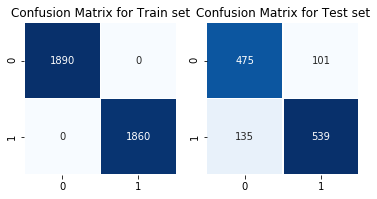

In [38]:
train_test_confusion_matrix(y_train, y_pred_train, y_test, y_pred_test)

Now we perform some hyper-parameter tuning to see if other Random Forest arguments would have led to a significantly higher performance. The below dictionary will test 4 different sizes of n_estimators and max_depth.

In [39]:
param_grid = {'n_estimators': [20, 40, 60, 80],
              'max_depth': [10, 20, 30, 40]}

In [40]:
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(clf, param_grid, cv=5)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=95),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'n_estimators': [20, 40, 60, 80]})

In [41]:
grid_clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=80)

In [42]:
print(grid_clf.score(X_test, y_test))

0.8232


As we can notice, the tested grid will return a similar score to what we have got previously, thus we can conclude that the initial choice was valid.

### 3. K-Nearest Neighbors

In [15]:
clf = KNeighborsClassifier(10)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("TRAIN METRICS")
print(sklearn.metrics.classification_report(y_train, y_pred_train))
print("TEST METRICS")
print(sklearn.metrics.classification_report(y_test, y_pred_test))

TRAIN METRICS
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1885
           1       0.80      0.80      0.80      1865

    accuracy                           0.80      3750
   macro avg       0.80      0.80      0.80      3750
weighted avg       0.80      0.80      0.80      3750

TEST METRICS
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       615
           1       0.77      0.77      0.77       635

    accuracy                           0.76      1250
   macro avg       0.76      0.76      0.76      1250
weighted avg       0.76      0.76      0.76      1250



We present the confusion matrix once data has been trained using KNN.

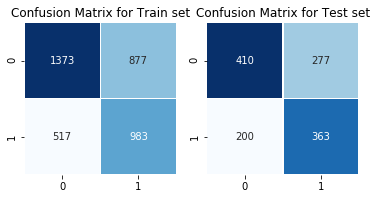

In [56]:
train_test_confusion_matrix(y_train, y_pred_train, y_test, y_pred_test)

So far we have performed a KNN algorithm on our train and test set with K=10. This returns a good accuracy. Now we want to check if there are actually other Ks which would lead to better results. Added to this, we will perform a cross-validation on the entire dataset. For example, for 3-fold cross validation, the dataset would be split into 3 groups, and the model would be trained and tested 3 separate times so each group would get a chance to be the test set.

In [54]:
k_range = np.arange(5, 50, 5)
k_scores = []

# use iteration to calculate accuracy on different k in models, then return the average accuracy based on the cross validation.
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())

From the below line chart, it looks like a K > 20 will return an accuracy greater than 75%.

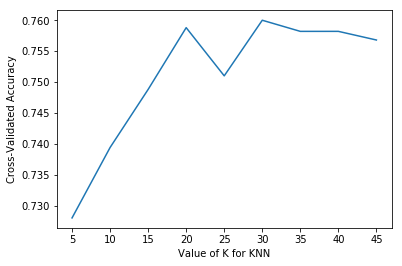

In [55]:
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### 4. Naive-Bayes

In [45]:
clf = sklearn.naive_bayes.GaussianNB()
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("TRAIN METRICS")
print(sklearn.metrics.classification_report(y_train, y_pred_train))
print("TEST METRICS")
print(sklearn.metrics.classification_report(y_test, y_pred_test))

TRAIN METRICS
              precision    recall  f1-score   support

           0       0.61      0.73      0.66      1890
           1       0.66      0.53      0.59      1860

    accuracy                           0.63      3750
   macro avg       0.63      0.63      0.62      3750
weighted avg       0.63      0.63      0.62      3750

TEST METRICS
              precision    recall  f1-score   support

           0       0.60      0.67      0.63       610
           1       0.64      0.57      0.60       640

    accuracy                           0.62      1250
   macro avg       0.62      0.62      0.62      1250
weighted avg       0.62      0.62      0.62      1250



We present the confusion matrix once data has been trained using Naive Bayes.

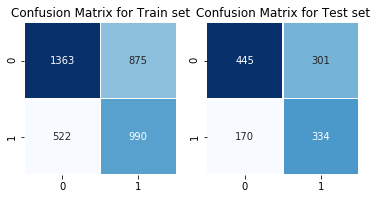

In [19]:
train_test_confusion_matrix(y_train, y_pred_train, y_test, y_pred_test)